In [1]:
!nvidia-smi

Sat Jan 20 16:59:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

In [4]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/MasterCourse/LanguageModeling

/content/drive/MyDrive/MasterCourse/LanguageModeling


In [7]:
df = pd.read_csv("/content/drive/MyDrive/MasterCourse/LanguageModeling/anime_genre_details_merged.csv")
df.head()

,title_name,title_english,url,score_label,description,episodes,aired,premiered,genres
0,Sousou no Frieren,Frieren: Beyond Journey's End,https://myanimelist.net/anime/52991/Sousou_no_Frieren,9.14,"During their decade-long quest to defeat the Demon King, the members of the hero's party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.\n\nHowever, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her ""usual"" routine of collecting spells across the continent. Due to her different sense of time...",28,"Sep 29, 2023 to ?",Fall 2023,"['Adventure', 'Drama', 'Fantasy', 'Shounen']"
1,Fullmetal Alchemist: Brotherhood,NaN,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood,9.09,"After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-...",64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Action', 'Adventure', 'Drama', 'Fantasy', 'Military', 'Shounen']"
2,Steins;Gate,NaN,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Eccentric scientist Rintarou Okabe has a never-ending thirst for scientific exploration. Together with his ditzy but well-meaning friend Mayuri Shiina and his roommate Itaru Hashida, Rintarou founds the Future Gadget Laboratory in the hopes of creating technological innovations that baffle the human psyche. Despite claims of grandeur, the only notable ""gadget"" the trio have created is a microwave that has the mystifying power to turn bananas into green goo.\n\nHowever, when Rintarou decides to attend neuroscientist Kurisu Makise's conference on time travel, he experiences a series of stran...",24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological', 'Time Travel']"
3,Gintama°,Gintama Season 4,https://myanimelist.net/anime/28977/Gintama°,9.06,"Gintoki, Shinpachi, and Kagura return as the fun-loving but broke members of the Yorozuya team! Living in an alternate-reality Edo, where swords are prohibited and alien overlords have conquered Japan, they try to thrive on doing whatever work they can get their hands on. However, Shinpachi and Kagura still haven't been paid... Does Gin-chan really spend all that cash playing pachinko?\n\nMeanwhile, when Gintoki drunkenly staggers home one night, an alien spaceship crashes nearby. A fatally injured crew member emerges from the ship and gives Gintoki a strange, clock-shaped device, warning ...",51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['Action', 'Comedy', 'Sci-Fi', 'Gag Humor', 'Historical', 'Parody', 'Samurai', 'Shounen']"
4,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2,9.05,"Seeking to restore humanity's diminishing hope, the Survey Corps embark on a mission to retake Wall Maria, where the battle against the merciless ""Titans"" takes the stage once again.\n\nReturning to the tattered Shiganshina District that was once his home, Eren Yeager and the Corps find the town oddly unoccupied by Titans. Even after the outer gate is plugged, they strangely encounter no opposition. The mission progresses smoothly until Armin Arlert, highly suspicious of the enemy's absence, discovers distressing signs of a potential sche

In [8]:
df.shape

(8950, 9)

# Gernres Count

In [9]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 74
{'Adventure': 2194, 'Drama': 1774, 'Fantasy': 2593, 'Shounen': 1599, 'Action': 3234, 'Military': 490, 'Sci-Fi': 1836, 'Suspense': 173, 'Psychological': 265, 'Time Travel': 114, 'Comedy': 3595, 'Gag Humor': 181, 'Historical': 729, 'Parody': 313, 'Samurai': 129, 'Gore': 195, 'Survival': 75, 'Adult Cast': 497, 'Space': 351, 'Romance': 1453, 'School': 1432, 'Seinen': 761, 'Supernatural': 899, 'Shoujo': 348, 'Award Winning': 189, 'Romantic Subtext': 45, 'Childcare': 51, 'Strategy Game': 153, 'Mecha': 756, 'Super Power': 455, 'Mystery': 686, 'Vampire': 126, 'Medical': 34, 'Sports': 441, 'Team Sports': 200, 'CGDCT': 209, 'Music': 394, 'Combat Sports': 65, 'Mythology': 386, 'Slice of Life': 667, 'Iyashikei': 148, 'Love Polygon': 77, 'Performing Arts': 79, 'Josei': 109, 'Reincarnation': 94, 'Showbiz': 30, 'Delinquents': 38, 'Workplace': 129, 'Ecchi': 570, 'Isekai': 264, 'Anthropomorphic': 171, 'Organized Crime': 59, 'Detective': 240, 'Horror': 251, 'Avant Garde': 47, 'Mahou

In [ ]:
df.isna().sum()

title_name          2
title_english    4113
url                 0
score_label         2
description         3
episodes            2
aired               2
premiered        5045
genres              0
dtype: int64

In [10]:
df.drop(["title_english","premiered"],axis = 1, inplace = True)
df.head(5)

,title_name,url,score_label,description,episodes,aired,genres
0,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_Frieren,9.14,"During their decade-long quest to defeat the Demon King, the members of the hero's party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.\n\nHowever, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her ""usual"" routine of collecting spells across the continent. Due to her different sense of time...",28,"Sep 29, 2023 to ?","['Adventure', 'Drama', 'Fantasy', 'Shounen']"
1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood,9.09,"After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-...",64,"Apr 5, 2009 to Jul 4, 2010","['Action', 'Adventure', 'Drama', 'Fantasy', 'Military', 'Shounen']"
2,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Eccentric scientist Rintarou Okabe has a never-ending thirst for scientific exploration. Together with his ditzy but well-meaning friend Mayuri Shiina and his roommate Itaru Hashida, Rintarou founds the Future Gadget Laboratory in the hopes of creating technological innovations that baffle the human psyche. Despite claims of grandeur, the only notable ""gadget"" the trio have created is a microwave that has the mystifying power to turn bananas into green goo.\n\nHowever, when Rintarou decides to attend neuroscientist Kurisu Makise's conference on time travel, he experiences a series of stran...",24,"Apr 6, 2011 to Sep 14, 2011","['Drama', 'Sci-Fi', 'Suspense', 'Psychological', 'Time Travel']"
3,Gintama°,https://myanimelist.net/anime/28977/Gintama°,9.06,"Gintoki, Shinpachi, and Kagura return as the fun-loving but broke members of the Yorozuya team! Living in an alternate-reality Edo, where swords are prohibited and alien overlords have conquered Japan, they try to thrive on doing whatever work they can get their hands on. However, Shinpachi and Kagura still haven't been paid... Does Gin-chan really spend all that cash playing pachinko?\n\nMeanwhile, when Gintoki drunkenly staggers home one night, an alien spaceship crashes nearby. A fatally injured crew member emerges from the ship and gives Gintoki a strange, clock-shaped device, warning ...",51,"Apr 8, 2015 to Mar 30, 2016","['Action', 'Comedy', 'Sci-Fi', 'Gag Humor', 'Historical', 'Parody', 'Samurai', 'Shounen']"
4,Shingeki no Kyojin Season 3 Part 2,https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2,9.05,"Seeking to restore humanity's diminishing hope, the Survey Corps embark on a mission to retake Wall Maria, where the battle against the merciless ""Titans"" takes the stage once again.\n\nReturning to the tattered Shiganshina District that was once his home, Eren Yeager and the Corps find the town oddly unoccupied by Titans. Even after the outer gate is plugged, they strangely encounter no opposition. The mission progresses smoothly until Armin Arlert, highly suspicious of the enemy's absence, discovers distressing signs of a potential scheme against them. \n\nShingeki no Kyojin Season 3 Par...",10,"Apr 29, 2019 to Jul 1, 2019","['Action', 'Drama', 'Suspense', 'Gore', 'Military', 'Survival', 'S

In [ ]:
df.isna().sum()

title_name     2
url            0
score_label    2
description    3
episodes       2
aired          2
genres         0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)
df.isna().sum()

title_name     0
url            0
score_label    0
description    0
episodes       0
aired          0
genres         0
dtype: int64

In [ ]:
df.shape

(8947, 7)

# Removing rare genres

In [12]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(24, ['Survival', 'Romantic Subtext', 'Childcare', 'Medical', 'Combat Sports'])

In [13]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(8927, 7)

In [14]:
df['revised_genres'] = revised_genre_list

In [15]:
df.tail()
#%%
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 50
{'Adventure': 2194, 'Drama': 1774, 'Fantasy': 2593, 'Shounen': 1599, 'Action': 3234, 'Military': 490, 'Sci-Fi': 1836, 'Suspense': 173, 'Psychological': 265, 'Time Travel': 114, 'Comedy': 3594, 'Gag Humor': 181, 'Historical': 729, 'Parody': 313, 'Samurai': 129, 'Gore': 195, 'Adult Cast': 497, 'Space': 351, 'Romance': 1453, 'School': 1431, 'Seinen': 761, 'Supernatural': 898, 'Shoujo': 348, 'Award Winning': 189, 'Strategy Game': 153, 'Mecha': 756, 'Super Power': 455, 'Mystery': 686, 'Vampire': 126, 'Sports': 441, 'Team Sports': 200, 'CGDCT': 209, 'Music': 394, 'Mythology': 385, 'Slice of Life': 667, 'Iyashikei': 148, 'Josei': 109, 'Reincarnation': 94, 'Workplace': 129, 'Ecchi': 570, 'Isekai': 264, 'Anthropomorphic': 171, 'Detective': 240, 'Horror': 251, 'Mahou Shoujo': 236, 'Martial Arts': 382, 'Kids': 514, 'Idols (Female)': 143, 'Video Game': 96, 'Harem': 361}


# Encoding Catagorization

In [16]:
print(revised_genre_count)
#%%
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

{'Adventure': 2194, 'Drama': 1774, 'Fantasy': 2593, 'Shounen': 1599, 'Action': 3234, 'Military': 490, 'Sci-Fi': 1836, 'Suspense': 173, 'Psychological': 265, 'Time Travel': 114, 'Comedy': 3594, 'Gag Humor': 181, 'Historical': 729, 'Parody': 313, 'Samurai': 129, 'Gore': 195, 'Adult Cast': 497, 'Space': 351, 'Romance': 1453, 'School': 1431, 'Seinen': 761, 'Supernatural': 898, 'Shoujo': 348, 'Award Winning': 189, 'Strategy Game': 153, 'Mecha': 756, 'Super Power': 455, 'Mystery': 686, 'Vampire': 126, 'Sports': 441, 'Team Sports': 200, 'CGDCT': 209, 'Music': 394, 'Mythology': 385, 'Slice of Life': 667, 'Iyashikei': 148, 'Josei': 109, 'Reincarnation': 94, 'Workplace': 129, 'Ecchi': 570, 'Isekai': 264, 'Anthropomorphic': 171, 'Detective': 240, 'Horror': 251, 'Mahou Shoujo': 236, 'Martial Arts': 382, 'Kids': 514, 'Idols (Female)': 143, 'Video Game': 96, 'Harem': 361}


In [ ]:
encode_genre_types

{'Adventure': 0,
 'Drama': 1,
 'Fantasy': 2,
 'Shounen': 3,
 'Action': 4,
 'Military': 5,
 'Sci-Fi': 6,
 'Suspense': 7,
 'Psychological': 8,
 'Time Travel': 9,
 'Comedy': 10,
 'Gag Humor': 11,
 'Historical': 12,
 'Parody': 13,
 'Samurai': 14,
 'Gore': 15,
 'Adult Cast': 16,
 'Space': 17,
 'Romance': 18,
 'School': 19,
 'Seinen': 20,
 'Supernatural': 21,
 'Shoujo': 22,
 'Award Winning': 23,
 'Strategy Game': 24,
 'Mecha': 25,
 'Super Power': 26,
 'Mystery': 27,
 'Vampire': 28,
 'Sports': 29,
 'Team Sports': 30,
 'CGDCT': 31,
 'Music': 32,
 'Mythology': 33,
 'Slice of Life': 34,
 'Iyashikei': 35,
 'Josei': 36,
 'Reincarnation': 37,
 'Workplace': 38,
 'Ecchi': 39,
 'Isekai': 40,
 'Anthropomorphic': 41,
 'Detective': 42,
 'Horror': 43,
 'Mahou Shoujo': 44,
 'Martial Arts': 45,
 'Kids': 46,
 'Idols (Female)': 47,
 'Video Game': 48,
 'Harem': 49}

# We need this because for multilabel classification all genres have possibility to be present in the predictions

In [17]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,title_name,url,score_label,description,episodes,aired,genres,revised_genres,genre_cat_list
0,Sousou no Frieren,https://myanimelist.net/anime/52991/Sousou_no_Frieren,9.14,"During their decade-long quest to defeat the Demon King, the members of the hero's party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.\n\nHowever, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her ""usual"" routine of collecting spells across the continent. Due to her different sense of time...",28,"Sep 29, 2023 to ?","['Adventure', 'Drama', 'Fantasy', 'Shounen']","[Adventure, Drama, Fantasy, Shounen]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood,9.09,"After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-...",64,"Apr 5, 2009 to Jul 4, 2010","['Action', 'Adventure', 'Drama', 'Fantasy', 'Military', 'Shounen']","[Action, Adventure, Drama, Fantasy, Military, Shounen]","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.07,"Eccentric scientist Rintarou Okabe has a never-ending thirst for scientific exploration. Together with his ditzy but well-meaning friend Mayuri Shiina and his roommate Itaru Hashida, Rintarou founds the Future Gadget Laboratory in the hopes of creating technological innovations that baffle the human psyche. Despite claims of grandeur, the only notable ""gadget"" the trio have created is a microwave that has the mystifying power to turn bananas into green goo.\n\nHowever, when Rintarou decides to attend neuroscientist Kurisu Makise's conference on time travel, he experiences a series of stran...",24,"Apr 6, 2011 to Sep 14, 2011","['Drama', 'Sci-Fi', 'Suspense', 'Psychological', 'Time Travel']","[Drama, Sci-Fi, Suspense, Psychological, Time Travel]","[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Gintama°,https://myanimelist.net/anime/28977/Gintama°,9.06,"Gintoki, Shinpachi, and Kagura return as the fun-loving but broke members of the Yorozuya team! Living in an alternate-reality Edo, where swords are prohibited and alien overlords have conquered Japan, they try to thrive on doing whatever work they can get their hands on. However, Shinpachi and Kagura still haven't been paid... Does Gin-chan really spend all that cash playing pachinko?\n\nMeanwhile, when Gintoki drunkenly staggers home one night, an alien spaceship crashes nearby. A fatally injured crew member emerges from the ship and gives Gintoki a strange, clock-shaped device, warning ...",51,"Apr 8, 2015 to Mar 30, 2016","['Action', 'Comedy', 'Sci-Fi', 'Gag Humor', 'Historical', 'Parody', 'Samurai', 'Shounen']","[Action, Comedy, Sci-Fi, Gag Humor, Historical, Parody, Samurai, Shounen]","[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Dataloaders and Modeling

In [19]:
labels = list(encode_genre_types.keys())

In [20]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [21]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [23]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-book-classifier.pkl")

In [24]:
dls.vocab

['Adventure', 'Drama', 'Fantasy', 'Shounen', 'Action', 'Military', 'Sci-Fi', 'Suspense', 'Psychological', 'Time Travel', 'Comedy', 'Gag Humor', 'Historical', 'Parody', 'Samurai', 'Gore', 'Adult Cast', 'Space', 'Romance', 'School', 'Seinen', 'Supernatural', 'Shoujo', 'Award Winning', 'Strategy Game', 'Mecha', 'Super Power', 'Mystery', 'Vampire', 'Sports', 'Team Sports', 'CGDCT', 'Music', 'Mythology', 'Slice of Life', 'Iyashikei', 'Josei', 'Reincarnation', 'Workplace', 'Ecchi', 'Isekai', 'Anthropomorphic', 'Detective', 'Horror', 'Mahou Shoujo', 'Martial Arts', 'Kids', 'Idols (Female)', 'Video Game', 'Harem']

In [25]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Tezuka × Atobe ÷ Koharu\nFudomine Middle School's tennis captain, Kippei Tachibana, asks rival school captains Kunimitsu Tezuka, Keigo Atobe, and Kuranosuke Shiraishi to assist him with his team's practice. Shiraishi's teammate, Koharu Konjiki, decides to tag along in hopes of being able to see his crush. Instead, Konjiki ends up becoming infatuated with both Tezuka and Atobe and struggles to pick between the two.\n\nFuji Kyoudai no Houkago (Fuji Brothers After School)\nSeishun's Shuusuke Fuji asks his younger","[Shounen, Comedy]"
1,"In the previous life, although Qin Yichen, the sage of alchemy, possessed the most alchemy technique in the mainland and was famous all over the world, but because of his mediocre martial arts attainments, he could only watch helplessly as his enemy Ouyang Haotian snatched the martial soul of his lover Feng Qianxue, and in front of his eyes Kill Feng Qianxue and his brother Tantai Shuo.\nIn grief, Qin Yichen was reborn with the help of the Heaven and Earth Spirit Orb, returning to his youth! In this life, Q","[Fantasy, Action]"
2,"This was the first attempt at an animated adaptation of Hamtarou, and consists of four short episodes. \n\nCrawling Around, Hamtarou (ドラマ ~ もぐりこんだら ハム太郎): Natsumi comes home and finds Hamtarou is missing from his cage. Shortly after, Hamtarou is revealed to be hiding under Natsumi's blanket, where he introduces himself to the viewer.\n\nHamuchanzu Corner ~ Biscuits in the Vase (ハムちゃんずコーナー ~ つぼの中のビスケット): Hamtarou and the Ham-Hams help Bijou retrieve a biscuit she had dropped while running on the roof posts. Aft","[Adventure, Shoujo]"
3,"A door opens, and a golden seal shatters a star.\n\nIt is the early 21st century. Mankind has lost the battle for planet Earth to Godzilla, and has taken to the stars in search of a new home. But the search ends in vain, forcing them and their alien allies back to Earth. But 20,000 years have passed in their absence, and the Earth is a wholly different place.\n\nThe planet's flora and fauna now embody and serve Godzilla. Earth is a monster's planet, ruled by the largest Godzilla ever at 300 meters in height. G","[Adventure, Action, Sci-Fi]"


In [26]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage 1

In [27]:
learner.freeze()

SuggestedLRs(slide=0.0010000000474974513, valley=9.120108734350652e-05)

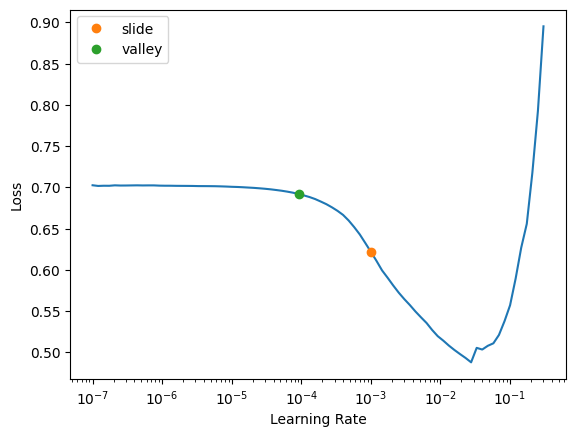

In [28]:
learner.lr_find(suggest_funcs=[slide, valley])

In [29]:
learner.fit_one_cycle(2,lr_max=9.12e-05)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.239284,0.221655,0.884596,00:34
1,0.221505,0.220338,0.890381,00:33


In [31]:
learner.save("anime-classifier-stage-0")

Path('models/anime-classifier-stage-0.pth')

In [32]:
learner.export("models/anime-classifier-stage-0.pkl")

# Stage 1

In [33]:
learner.unfreeze()

SuggestedLRs(slide=0.0063095735386013985, valley=1.4454397387453355e-05)

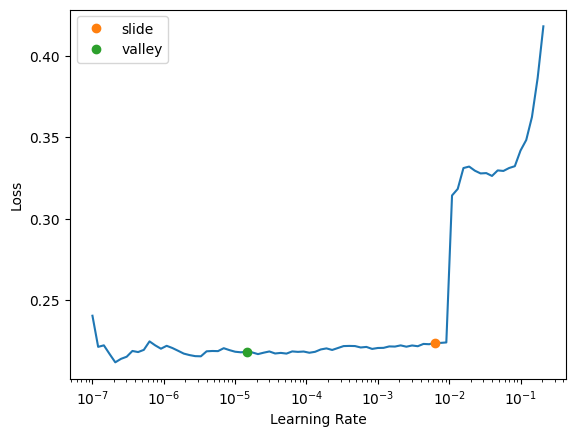

In [34]:
learner.lr_find(suggest_funcs=[slide, valley])

In [35]:
learner.fit_one_cycle(3, lr_max=slice(1e-3, 1.44e-05))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.193240,0.186857,0.915202,00:45
1,0.170375,0.175613,0.921502,00:45
2,0.153875,0.171186,0.921323,00:46


In [36]:
learner.save("anime-classifier-stage-1")

Path('models/anime-classifier-stage-1.pth')

In [37]:
learner.export("models/anime-classifier-stage-1.pkl")